# Introduction

Perform an *Exploratory Data Analysis* over the Healthcare Dataset, in order to understand what kind of data are available and discover potential patterns.

In [1]:
# Import Standard Libraries
import pandas as pd

import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from colorama import Style, Fore

# Import Package Modules
from general_utils.general_utils import read_configuration

# Setup Notebook

## Setup Plots Characteristics

In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [3]:
# Define Colors
black = Style.BRIGHT + Fore.BLACK
magenta = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blue = Style.BRIGHT + Fore.BLUE
reset_colors = Style.RESET_ALL

## Define Configurations

In [4]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

In [5]:
# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'config.yaml')

[03/12/2024 20:42:39 - general_utils] INFO - read_configuration - Start
[03/12/2024 20:42:39 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/MediBioticsAI/configuration/config.yaml
[03/12/2024 20:42:39 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/MediBioticsAI/configuration/config.yaml read successfully
[03/12/2024 20:42:39 - general_utils] INFO - read_configuration - End


In [6]:
# Extract variables
healthcare_data_path = config['healthcare_dataset_path']
healthcare_data_dates = config['healthcare_dataset_dates']

# Read Data

In [7]:
# Define path
healthcare_data_path = root_path / healthcare_data_path[0] / healthcare_data_path[1] / healthcare_data_path[2]

In [8]:
# Read data
healthcare_dataset = pd.read_csv(healthcare_data_path, 
                                 parse_dates=healthcare_data_dates)

# Exploratory Data Analysis

## General

### Data Types

In [9]:
healthcare_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

### Sample Data

In [10]:
healthcare_dataset.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


- There is a mix of numerical and categorical features
- The label is categorical

### Shape

In [11]:
# Print shapes information
print(f'{blue}Data Shapes:'
      f'{blue}\n- All Data -> {red}{healthcare_dataset.shape}\n')

Data Shapes:
- All Data -> (10000, 15)



### Null Values

In [12]:
# Print null values information
print(f'{blue}Data Columns with Null Values:'
      f'{blue}\n- All Data -> {red}{healthcare_dataset.isnull().any().sum()}\n')

Data Columns with Null Values:
- All Data -> 0



## Feature Distribution

### Numerical Feature Distribution

In [13]:
# Define raw numerical features
raw_numerical_features = [
    'Age',
    'Billing Amount',
    'Room Number'
]

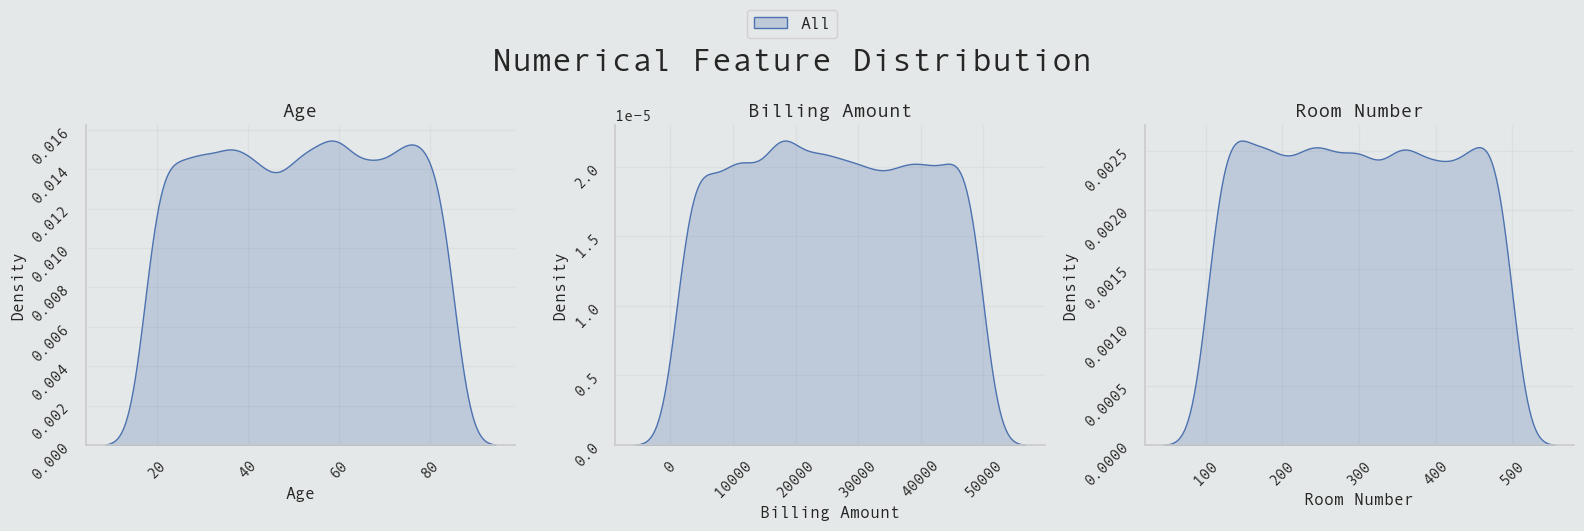

In [16]:
# Plot the KDE of each feature
figure, ax = plt.subplots(1, 3, figsize=(16, 5))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_features):
    
    # Plot data
    sns.kdeplot(data=healthcare_dataset[column_name],
                fill=True,
                label='All',
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

# Set figure Title
figure.suptitle('Numerical Feature Distribution',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

- All the numberical features are normally distributed

### Categorical Feature Distribution

#### Name Distribution

In [23]:
# Show top 5 names
healthcare_dataset['Name'].value_counts().reset_index().sort_values(by='count', ascending=False).head()

,Name,count
0,Michael Johnson,7
1,James Johnson,6
9,Joseph Smith,4
2,Scott Smith,4
3,John Johnson,4


- The column `Name` does not hold any significance with the label, thus can be excluded